### Import Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_rel

### (P)ACE - Plan Phase
#### Part 1 - Data
##### How are the observations in the dataset collected?

* The data has been sourced from the the Economic Policy Institute’s State of Working America Data Library, which is a dependable and trustworthy source for economic data.
* It is assumed that the data was gathered through methods such as random sampling from various regions across the US.
* As the data collected is based on observations rather than a controlled experiment, it is not possible to infer causation.


#### Part 2 - Research Question
##### Project Scope
* This analysis examines the historic and current gender wage gap in the United States between Males and Females, and whether it is narrowing, remaining consistent, or widening over time.

### P(A)CE - Analyze Phase
#### Part 3 - EDA (Exploratory Data Analysis)
##### Investigate the Dataset

In [2]:
# Read in the dataset
df = pd.read_csv('median_average_wages.csv')
df.head()

,year,median,average,men_median,men_average,women_median,women_average,white_median,white_average,black_median,...,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,recent_high-school_graduate,men_recent_high-school_graduate,women_recent_high-school_graduate,recent_college_graduate,men_recent_college_graduate,women_recent_college_graduate
0,2022,22.88,32.00,24.91,35.82,20.74,27.86,24.96,34.49,19.60,...,19.00,23.99,17.54,22.60,16.02,16.86,14.77,25.68,28.24,23.74
1,2021,23.05,32.08,24.93,35.61,21.46,28.28,25.40,34.50,19.45,...,18.85,24.13,17.77,22.90,15.23,15.86,14.33,25.68,28.66,23.47
2,2020,23.64,32.54,25.95,36.03,21.72,28.75,25.98,34.86,19.85,...,19.26,24.87,17.55,23.03,14.65,15.48,13.55,27.42,29.01,26.26
3,2019,22.12,30.36,24.04,33.65,20.42,26.83,24.39,32.79,18.45,...,18.08,23.17,17.08,21.50,14.54,15.36,13.47,24.70,26.59,23.30
4,2018,21.90,29.83,23.42,33.19,19.73,26.21,23.97,32.44,17.57,...,17.34,22.55,16.24,20.60,13.83,14.59,12.71,24.08,25.66,22.84


In [3]:
# Check for duplicates
df.shape
df.drop_duplicates().shape

(50, 31)

In [4]:
# Check for missing values
df_missing_values = df.isnull().sum()
df_missing_values.head()

year           0
median         0
average        0
men_median     0
men_average    0
dtype: int64

In [5]:
# Summary statistics

summary = df.describe()
print(summary)

             year     median    average  men_median  men_average  \
count    50.00000  50.000000  50.000000   50.000000    50.000000   
mean   1997.50000  20.261600  25.564600   23.241000    28.921400   
std      14.57738   1.214325   2.848557    0.912702     2.706539   
min    1973.00000  18.780000  22.420000   21.510000    26.200000   
25%    1985.25000  19.280000  23.045000   22.815000    26.630000   
50%    1997.50000  19.810000  24.550000   23.360000    27.855000   
75%    2009.75000  21.107500  27.335000   23.765000    30.185000   
max    2022.00000  23.640000  32.540000   25.950000    36.030000   

       women_median  women_average  white_median  white_average  black_median  \
count      50.00000      50.000000     50.000000       50.00000     50.000000   
mean       17.59580      21.699400     21.692200       27.03100     17.097400   
std         1.90173       3.362138      1.755276        3.46881      1.077739   
min        14.88000      17.010000     19.430000       23.08000

##### Data Manipulation and Cleaning

In [6]:
# Keep only columns necessary for analysis

df_trimmed = df[['year', 'average', 'men_average', 'women_average']]
df_trimmed.head(5)

,year,average,men_average,women_average
0,2022,32.00,35.82,27.86
1,2021,32.08,35.61,28.28
2,2020,32.54,36.03,28.75
3,2019,30.36,33.65,26.83
4,2018,29.83,33.19,26.21


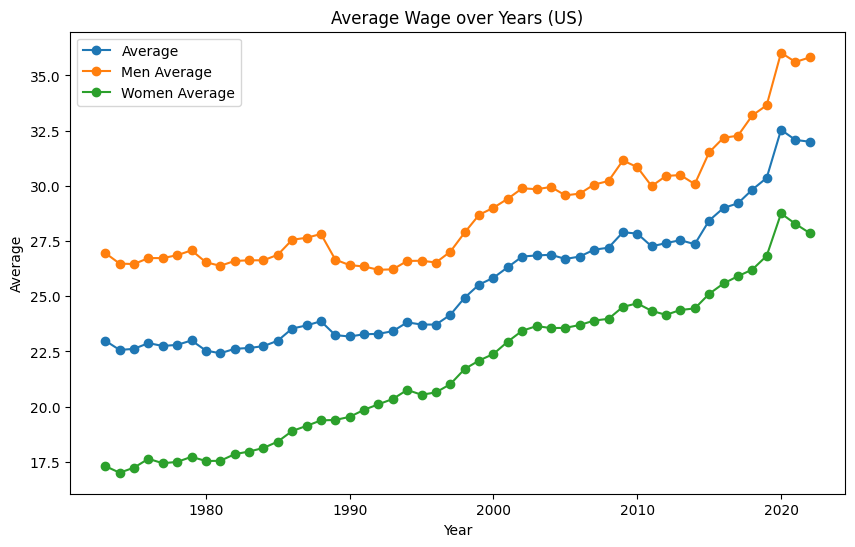

In [7]:
## Plot the averages

plt.figure(figsize=(10,6))
plt.plot(df_trimmed['year'], df_trimmed['average'], marker='o', label='Average')
plt.plot(df_trimmed['year'], df_trimmed['men_average'], marker='o', label='Men Average')
plt.plot(df_trimmed['year'], df_trimmed['women_average'], marker='o', label='Women Average')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average Wage over Years (US)')
plt.legend()
plt.savefig('Average Wage over Years.png')
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_5956\19427341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']
C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype i

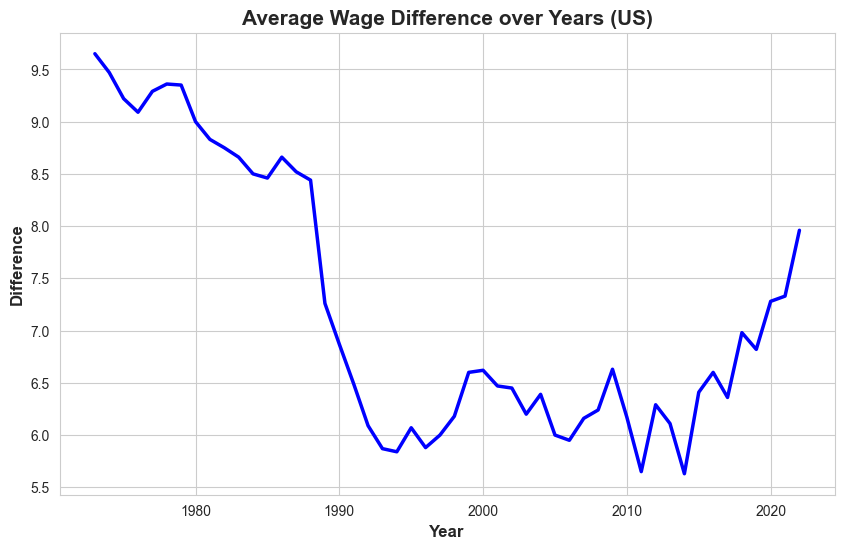

In [20]:
## Plot the differences of men and women average wages
df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10,6))

# Plot data
sns.lineplot(x='year', y='difference', data=df_trimmed, ax=ax, color='blue', linewidth=2.5)

# Set the title and labels
ax.set_title('Average Wage Difference over Years (US)', fontsize=15, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Difference', fontsize=12, fontweight='bold')

# Show the plot
plt.savefig('Average Wage Difference over Years (US).png')
plt.show()

After conducting an initial investigation of the dataset, it appears that the difference in wages between males and females was more pronounced during the period from the 1970s to the late-1980s. However, since then, the gap has decreased somewhat and remained relatively stable until approximately 2018, where the difference begins to increase. It is important to note that the absence of a further decrease in the wage gap could be due to various factors that were not taken into account during this analysis.
To determine whether the consistent wage gap observed here is a result of other variables, a more detailed examination of specific work sectors and professions would be necessary.

Additionally, although wage rates overall have increased over the years, there was a significant increase in wage rates from 2019 to 2020, followed by a decline. It would be worth investigating this timeframe futher.

##### Conditions for a Paired T-Test

To determine if there is a correlation between average wages of men and women at a high level, a paired T-Test will be used, without considering other (confounding / extraneous) variables that may affect the data.

1. Independence
- Sampled observations must be independent (random sample/assignment & if sampling without replacement, n < 10% of population)
2. Sample Size/Skew
- n ≥ 30; larger if the population distribution is very skewed.

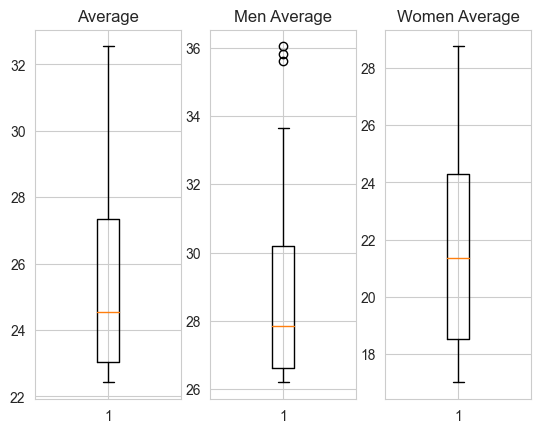

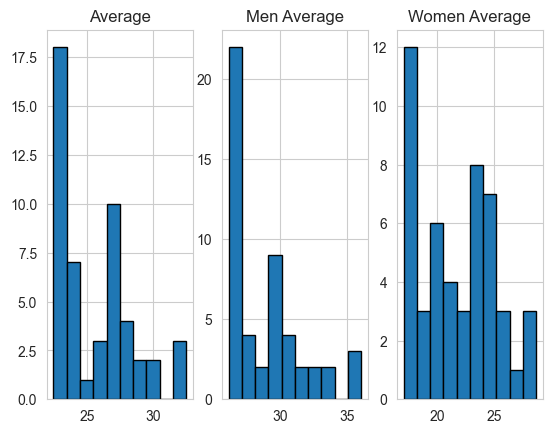

In [21]:
## Boxplots for Averages
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=3)

# Create boxplots
axs[0].boxplot(df_trimmed['average'])
axs[0].set_title('Average')

axs[1].boxplot(df_trimmed['men_average'])
axs[1].set_title('Men Average')

axs[2].boxplot(df_trimmed['women_average'])
axs[2].set_title('Women Average')

# Display the plot
plt.savefig('Boxplots for Averages.png')
plt.show()

## Histograms for Averages
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=3)

# Create histograms
axs[0].hist(df_trimmed['average'], bins=10, edgecolor='black')
axs[0].set_title('Average')

axs[1].hist(df_trimmed['men_average'], bins=10, edgecolor='black')
axs[1].set_title('Men Average')

axs[2].hist(df_trimmed['women_average'], bins=10, edgecolor='black')
axs[2].set_title('Women Average')

# Display the plot
plt.savefig('Histograms for Averages.png')
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_5956\3257545710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']


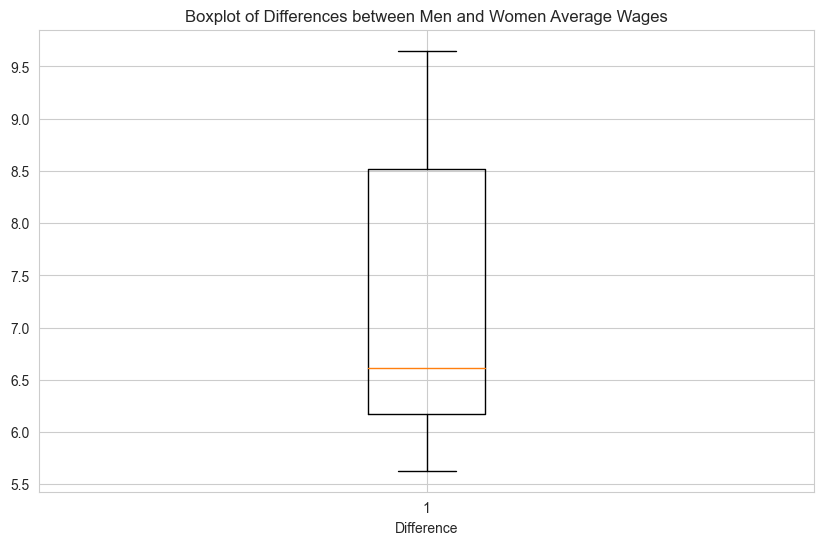

In [22]:
## Calculate the differences between men_average and women_average to determine whether there is symmetry of differences required for a paired T-Test.
df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']

# Plot the boxplot of differences
plt.figure(figsize=(10,6))
plt.boxplot(df_trimmed['difference'])
plt.xlabel('Difference')
plt.title('Boxplot of Differences between Men and Women Average Wages')
plt.savefig('Boxplot of Differences between Average Wages.png')
plt.show()

### PA(C)E - Construct Phase of the PACE Framework
#### Part 4 - Modeling/Inference 

H0 (nothing going on): There is no difference in average wages between men and women.

HA (something going on): There is a difference in average wages between men and women.

* Even though the plots indicate a noticeable disparity in wages between men and women, further statistical tests will be conducted to support these findings for the purpose of this practice analysis.

In [16]:
# Calculate the difference between men_average and women_average
df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']

# Calculate the mean of the difference of means
mean_difference = df_trimmed['difference'].mean()
print("Mean Difference")
print(mean_difference)
print("")

# Calculate the standard deviation of the difference of means
std_difference = df_trimmed['difference'].std()
print("Std Difference")
print(std_difference)
print("")

# Calculate the standard error of the difference of means
se_difference = std_difference / np.sqrt(len(df_trimmed))
print("SE Difference")
print(se_difference)
print("")

# Calculate the degrees of freedom
dfreedom = len(df_trimmed) - 1
print("DOF")
print(dfreedom)
print("")

# Calculate the critical value for a 95% confidence interval
critical_value = stats.t.ppf(1 - 0.05 / 2, dfreedom)
print("Critical Value for a 95% CI")
print(critical_value)
print("")

# Calculate the margin of error
margin_of_error = critical_value * se_difference
print("Margin of Error")
print(margin_of_error)
print("")

Mean Difference
7.222

Std Difference
1.2915218044727588

SE Difference
0.1826487651985948

DOF
49

Critical Value for a 95% CI
2.009575234489209

Margin of Error
0.36704643515313057



C:\Users\Personal\AppData\Local\Temp\ipykernel_5956\2980653303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['difference'] = df_trimmed['men_average'] - df_trimmed['women_average']


#### Part 5 - Prediction/Conclusion

In [17]:
## Calculate the confidence interval
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)
print("Confidence Interval")
print(confidence_interval)

Confidence Interval
(6.85495356484687, 7.589046435153131)


In [18]:
## Compute Pearson Correlation
correlation, p_value = pearsonr(df_trimmed['men_average'], df['women_average'])

print(f'Correlation: {correlation}')
print(f'P-value: {p_value}')

Correlation: 0.9319642390765344
P-value: 8.670121931277063e-23


Correlation between average wages of men and women is near 1, and the P-value is significantly lower than 0.05, indicating a strong relationship.

In [19]:
## Perform Paired T-Test
t_statistic, p_value = ttest_rel(df_trimmed['men_average'], df['women_average'])

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 39.54037133592164
P-value: 7.718116847532662e-39


The P-value result from the paired T-Test is significantly lower than 0.05, indicating the null hypothesis is to be rejected in favour of the alternative; there is a statistically significant difference in the average wages between men and women overall.

### PAC(E)- Execute Phase of the PACE Framework
#### What Story does the Data Tell?

Since the 1970s, when data on average wage rates began being recorded, there has been a clear disparity between the wages earned by men and women. The wage gap started to reduce from the 1970s until the mid-1990s, after which it remained relatively consistent until around 2015, when the gap began to widen again.

Although this analysis does not provide any insight into the reasons behind the wage gap, why it decreased during a certain period, and why it is increasing again, it does indicate that there is a statistically significant correlation between gender and wages, and that the gap itself is significant.

A more detailed analysis will be required to determine why this gap exists, by examining specific industries and professions where men and women are equally qualified, and taking into account any factors that may be influencing the gap.